X_train: (455, 30)
X_test: (114, 30)
y_train distribution:
 diagnosis
Benign       285
Malignant    170
Name: count, dtype: int64
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



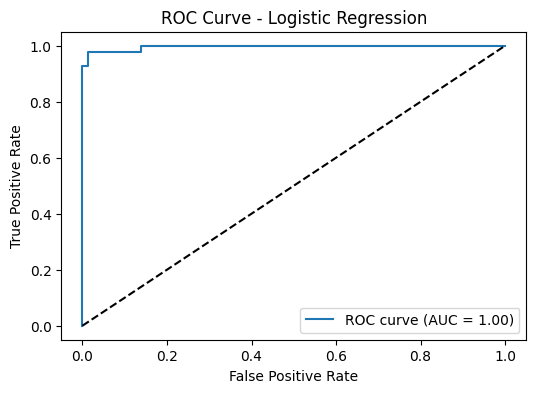

Top features by absolute coefficient:
                 feature  coefficient
21        worst texture     1.434093
10         radius error     1.233325
28       worst symmetry     1.061264
7   mean concave points     0.952813
26      worst concavity     0.911406
13           area error     0.909029
15    compactness error    -0.906925
23           worst area     0.900477
20         worst radius     0.896968
6        mean concavity     0.782298


In [1]:
# Train Linear Regression Model 

# 1️ Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2️ Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Map target to readable labels
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# 3️ Define features and target
X = df.drop(columns=['target', 'diagnosis'])
y = df['diagnosis']

# 4️ Split into train/test sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())

# 5️ Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️ Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 7️ Train model
log_reg.fit(X_train_scaled, y_train)

# 8️ Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]  # Probability for 'Malignant' class

# 9️ Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10 ROC Curve
roc_auc = roc_auc_score((y_test=='Malignant').astype(int), y_prob)
fpr, tpr, thresholds = roc_curve((y_test=='Malignant').astype(int), y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# 11 Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print("Top features by absolute coefficient:\n", feature_importance.head(10))

Random Forest Accuracy: 0.9736842105263158
Confusion Matrix:
 [[72  0]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



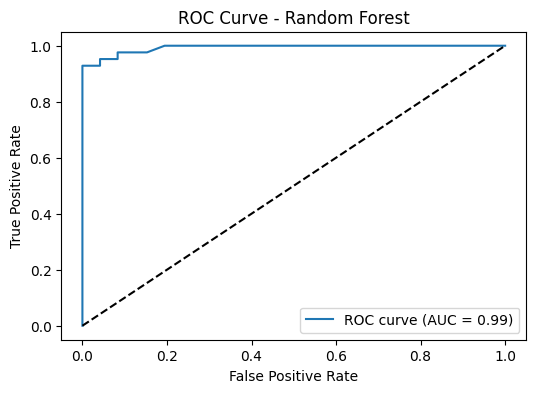

Top features by importance:
                  feature  importance
23            worst area    0.151412
27  worst concave points    0.126497
20          worst radius    0.093475
22       worst perimeter    0.083642
7    mean concave points    0.081082
2         mean perimeter    0.077126
0            mean radius    0.061990
6         mean concavity    0.050818
3              mean area    0.045916
26       worst concavity    0.030022


In [2]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# 1️ Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42,
    max_depth=None,    # full depth
    min_samples_split=2
)

# 2️ Train model on scaled training data
rf_model.fit(X_train_scaled, y_train)

# 3️ Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:,1]  # Probability for 'Malignant'

# 4️ Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 5️ ROC Curve
roc_auc_rf = roc_auc_score((y_test=='Malignant').astype(int), y_prob_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve((y_test=='Malignant').astype(int), y_prob_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# 6️ Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Top features by importance:\n", feature_importance_rf.head(10))

SVM Accuracy: 0.9649122807017544
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



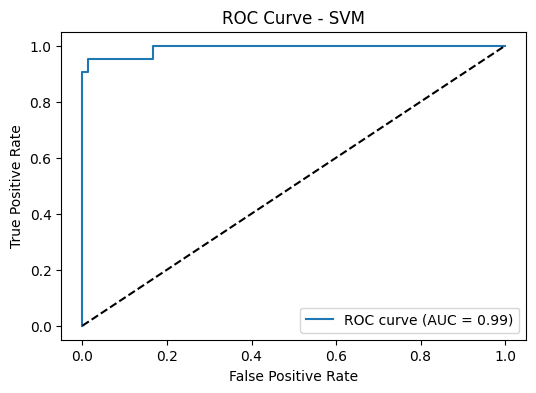

Top features by absolute coefficient:
                 feature  coefficient
21        worst texture     1.071995
6        mean concavity     0.880175
13           area error     0.829700
7   mean concave points     0.827597
26      worst concavity     0.824417
10         radius error     0.755905
23           worst area     0.725480
11        texture error    -0.613818
20         worst radius     0.541589
15    compactness error    -0.535861


In [4]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

# 1 Initialize SVM (linear kernel, probability=True for ROC)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# 2️ Train model on scaled training data
svm_model.fit(X_train_scaled, y_train)

# 3️ Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:,1]  # Probability for 'Malignant'

# 4️ Evaluate model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# 5️ ROC Curve
roc_auc_svm = roc_auc_score((y_test=='Malignant').astype(int), y_prob_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve((y_test=='Malignant').astype(int), y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

# 6️ Feature importance (for linear kernel)
svm_features = pd.DataFrame({
    'feature': X.columns,
    'coefficient': svm_model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print("Top features by absolute coefficient:\n", svm_features.head(10))

Gradient Boosting Accuracy: 0.9649122807017544
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



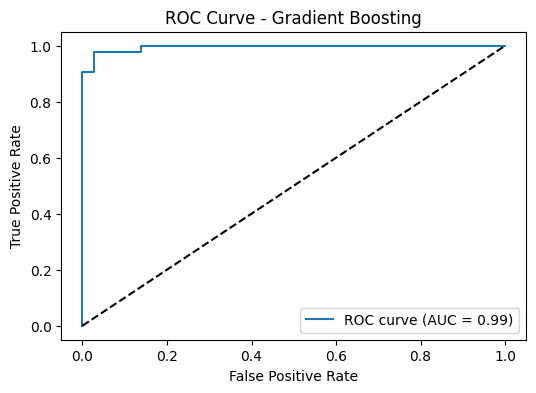

Top features by importance:
                  feature  importance
22       worst perimeter    0.529508
7    mean concave points    0.154125
27  worst concave points    0.081236
20          worst radius    0.054390
1           mean texture    0.031420
21         worst texture    0.027834
23            worst area    0.025192
26       worst concavity    0.018872
3              mean area    0.015024
13            area error    0.014114


In [5]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

# 1️ Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # number of trees
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 2️ Train on scaled training data
gb_model.fit(X_train_scaled, y_train)

# 3️ Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:,1]  # Probability for 'Malignant'

# 4️ Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# 5️ ROC Curve
roc_auc_gb = roc_auc_score((y_test=='Malignant').astype(int), y_prob_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve((y_test=='Malignant').astype(int), y_prob_gb)

plt.figure(figsize=(6,4))
plt.plot(fpr_gb, tpr_gb, label=f'ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

# 6️ Feature importance
gb_features = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Top features by importance:\n", gb_features.head(10))

In [6]:
# Model Comparison Table

# Collect metrics for each model
from sklearn.metrics import precision_score, recall_score, f1_score

models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']
y_preds = [y_pred, y_pred_rf, y_pred_svm, y_pred_gb]  # predictions from each model

# Initialize list to store metrics
metrics_list = []

for model_name, y_pred_model in zip(models, y_preds):
    acc = accuracy_score(y_test, y_pred_model)
    prec = precision_score(y_test, y_pred_model, pos_label='Malignant')
    rec = recall_score(y_test, y_pred_model, pos_label='Malignant')
    f1 = f1_score(y_test, y_pred_model, pos_label='Malignant')
    metrics_list.append({
        'Model': model_name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1-score': round(f1, 3)
    })

# Convert to DataFrame for easy display
comparison_df = pd.DataFrame(metrics_list)
print(comparison_df)

                 Model  Accuracy  Precision  Recall  F1-score
0  Logistic Regression     0.965      0.975   0.929     0.951
1        Random Forest     0.974      1.000   0.929     0.963
2                  SVM     0.965      1.000   0.905     0.950
3    Gradient Boosting     0.965      1.000   0.905     0.950
